In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import cv2
import imghdr

In [2]:
batch_size = 64
img_height = 48
img_width = 48


In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
 "D:/facial_expression/train",
  labels = "inferred",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode='grayscale',
  label_mode="categorical")

Found 28709 files belonging to 7 classes.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
 "D:/facial_expression/test",
  labels = 'inferred',
  label_mode = "categorical",
  seed=123,
  image_size=(48, 48),
  batch_size=batch_size,
  color_mode='grayscale')

Found 7178 files belonging to 7 classes.


In [5]:
class_names = train_ds.class_names
class_names


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [6]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(64, 48, 48, 1)
(64, 7)


In [7]:
train_ds = train_ds.map(lambda x,y: (x/255, y))
val_ds = val_ds.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [8]:
train_ds.as_numpy_iterator().next()[0].min()

0.0

In [9]:
val_ds.as_numpy_iterator().next()[0].max()

1.0

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(48,48,)),
    tf.keras.layers.Dense(1024, activation= 'relu'),
    tf.keras.layers.Dense(512, activation= 'relu'),
    tf.keras.layers.Dense(256, activation= 'relu'),
    tf.keras.layers.Dense(128, activation= 'relu'),
     tf.keras.layers.Dense(64, activation= 'relu'),
     tf.keras.layers.Dense(64, activation= 'relu'),
     tf.keras.layers.Dense(32, activation= 'relu'),
    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [12]:
from tensorflow.keras import optimizers
opt=optimizers.Adam(0.001)

In [15]:
model.compile(optimizer=opt,
  loss="categorical_crossentropy",
    metrics=['accuracy'])

In [14]:
model.compile("adam",
  loss="categorical_crossentropy",
    metrics=['accuracy'])

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 1024)              2360320   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [18]:
history_1 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100,
)

Epoch 1/100
449/449 [==============================] - 34s 69ms/step - loss: 1.8250 - accuracy: 0.2383 - val_loss: 1.7615 - val_accuracy: 0.2842
Epoch 2/100
449/449 [==============================] - 17s 37ms/step - loss: 1.7494 - accuracy: 0.2897 - val_loss: 1.7260 - val_accuracy: 0.3016
Epoch 3/100
449/449 [==============================] - 16s 36ms/step - loss: 1.7140 - accuracy: 0.3157 - val_loss: 1.6767 - val_accuracy: 0.3376
Epoch 4/100
449/449 [==============================] - 16s 36ms/step - loss: 1.6916 - accuracy: 0.3321 - val_loss: 1.6617 - val_accuracy: 0.3526
Epoch 5/100
449/449 [==============================] - 16s 36ms/step - loss: 1.6771 - accuracy: 0.3393 - val_loss: 1.6599 - val_accuracy: 0.3594
Epoch 6/100
449/449 [==============================] - 16s 36ms/step - loss: 1.6587 - accuracy: 0.3509 - val_loss: 1.6389 - val_accuracy: 0.3650
Epoch 7/100
449/449 [==============================] - 16s 36ms/step - loss: 1.6442 - accuracy: 0.3587 - val_loss: 1.6170 - val_ac

In [19]:
model.save('ai.h5')

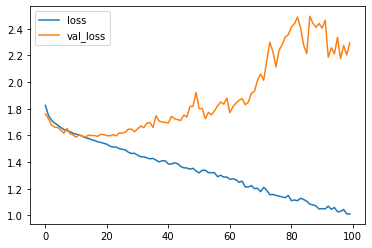

In [20]:
plt.plot(history_1.history['loss'], label= 'loss')
plt.plot(history_1.history['val_loss'], label= 'val_loss')
plt.legend()

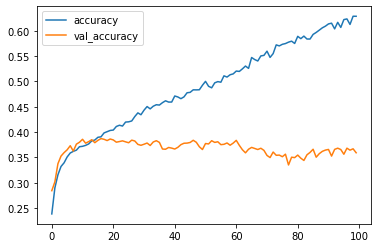

In [21]:
plt.plot(history_1.history['accuracy'], label= 'accuracy')
plt.plot(history_1.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

(48, 48, 1)


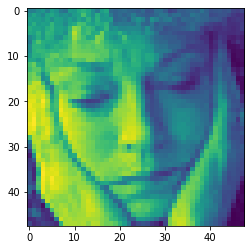

In [22]:
from tensorflow.keras.preprocessing import image
img_path="D:/facial_expression/test/sad/PrivateTest_2326190.jpg"
test_image=image.load_img(img_path,target_size=(48,48),color_mode='grayscale')
test_image=image.img_to_array(test_image)
print(test_image.shape)
plt.imshow(test_image)
plt.show()

In [23]:
test_image=test_image.reshape(1,48,48,1)
classes=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
result=model.predict(test_image)
print(result[0])
y_pred=np.argmax(result[0])
print('The person facial emotion is:',classes[y_pred])

1/1 [==============================] - 0s 239ms/step
[0. 0. 1. 0. 0. 0. 0.]
The person facial emotion is: Fear


1/1 [==============================] - 0s 16ms/step
 the image is of Happy


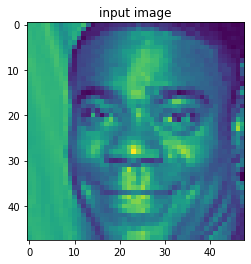

In [24]:
#"D:\facial_expression\test\happy\PrivateTest_95094.jpg"
path = "D:/facial_expression/test/happy/PrivateTest_95094.jpg"
img = image.load_img(path, target_size=(48,48) ,color_mode='grayscale')

i = image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {classes[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()
